In [15]:
#import dependencies
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [36]:
#Read the csv into a dataframe
df = pd.read_csv('myopia.csv')
labels = df['MYOPIC']
df.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,0
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,0


In [23]:
#Remove MYOPIC column from dataset
cleaned_df = df.drop('MYOPIC', axis=1)
cleaned_df.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0


In [24]:
#Standardize the dataset
scaler = StandardScaler()
df_x = scaler.fit_transform(cleaned_df)


In [33]:
#Perform dimensionality reduction with PCA
pca = PCA(n_components=0.90)
pca_df = pca.fit_transform(df_x)
pca_df.shape

(618, 10)

In [29]:
#Further reduce with t-SNE
from sklearn.manifold import TSNE
tsne = TSNE(learning_rate=350)
tsne_features = tsne.fit_transform(pca_df)

/Users/joshuasamuel/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


In [30]:
tsne_features.shape

(618, 2)

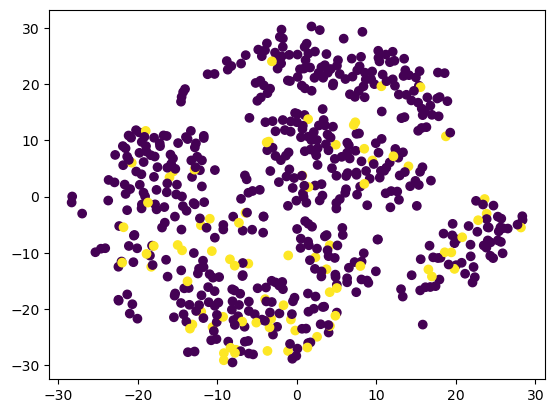

In [37]:
plt.scatter(tsne_features[:,0], tsne_features[:,1], c = labels)
plt.show()

The above scatterplot seems to have 4 or 5 different clusters.

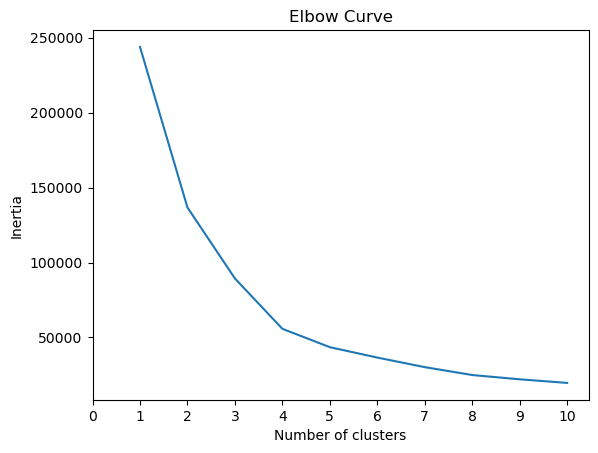

In [32]:
#Create a elbow plot
from sklearn.cluster import KMeans
inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(tsne_features)
    inertia.append(km.inertia_)

# Creating the Elbow Curve
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(list(range(11)))
plt.title('Elbow Curve')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

The elbow of the plot seems to be when k=4

## Findings
From the chart, it does not look like the patients can be clustered together to see if patients are myopic or not.